In [1]:
#imported required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy import stats as st
import math

In [2]:
#Load up the file
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#head and shape of data
#lets print some of the train data just to get used to using pandas
t_head = train.head()
#either u can use seems like below 
#print(train_set.loc[0:5]['y'])
#print(train_set.loc[0:5]['x'])
#Shape
t_shape = train.shape
print("head", t_head )
print('\n' "shape", t_shape)


head       x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

shape (700, 2)


In [4]:
tt_head = test.head()
tt_shape = test.shape
print("head", tt_head )
print('\n' "shape", tt_shape)

head     x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864

shape (300, 2)


In [5]:
#was cleaning the unwanted data 
train_set = train.dropna()
test_set = test.dropna()

In [6]:
# after clean see the effect of it
print("rows before clean:   ",train.size,"\n")
print("rows befter clean:   ",train_set.size,"\n")
t_s = train_set.shape
print(t_s)

rows before clean:    1400 

rows befter clean:    1398 

(699, 2)


In [7]:
# after clean see the effect of it
print("rows before clean:   ",test.size,"\n")
print("rows befter clean:   ",test_set.size,"\n")
tt_s = test_set.shape
print(tt_s)

rows before clean:    600 

rows befter clean:    600 

(300, 2)


In [8]:
# Review some of the statistics to check whether the data is skewed
print ("Mean of  Training set: ", np.mean(train_set), "\n")
print ("Median of Training set: ", np.median(train_set), "\n")

print ("Std Dev of Training set: ", np.std(train_set), "\n")
print ("Std Dev of  Training set: ", np.std(train_set), "\n")

Mean of  Training set:  x    50.014306
y    49.939869
dtype: float64 

Median of Training set:  49.0 

Std Dev of Training set:  x    28.933841
y    29.088388
dtype: float64 

Std Dev of  Training set:  x    28.933841
y    29.088388
dtype: float64 



EDA

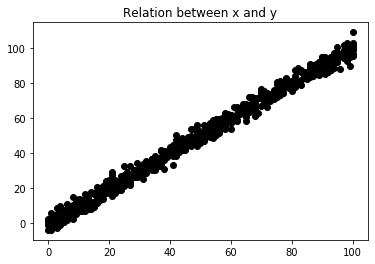

In [9]:
plt.title("Relation between x and y")
plt.scatter(train_set.x,train_set.y, color='black')
plt.show()

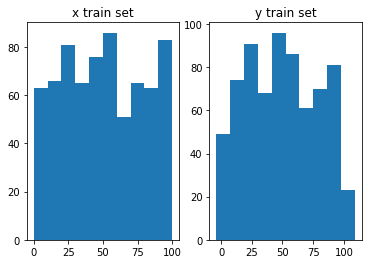

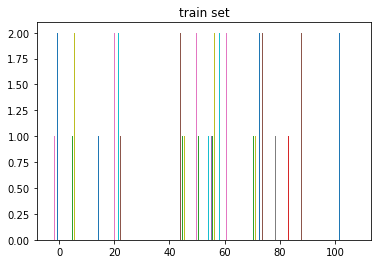

In [10]:
#use subplot to have graphs side by side
plt.subplot(1,2,1)
plt.title("x train set")
plt.hist(train_set.x)
#y
plt.subplot(1,2,2)
plt.title("y train set")
plt.hist(train_set.y)
plt.show()
#Full

plt.title("train set")
plt.hist(train_set)
plt.show()

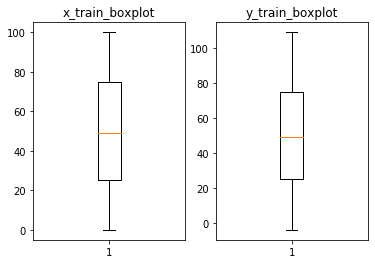

In [11]:
#Box plot
plt.subplot(1,2,1)
plt.title("x_train_boxplot")
plt.boxplot(train_set.x)

plt.subplot(1,2,2)
plt.title("y_train_boxplot")
plt.boxplot(train_set.y)
plt.show()


In [12]:
#NOR THIS
model = smf.ols("x~y", data = train_set).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:05:08   Log-Likelihood:                -1709.1
No. Observations:                 699   AIC:                             3422.
Df Residuals:                     697   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5713      0.210      2.721      0.0

In [13]:
print("parameter:", model.params,"\n")
print("r2", model.rsquared,"\n")
print("standard error:", model.bse,"\n")
print('Predicted values: ', model.predict)

parameter: Intercept    0.571255
y            0.990052
dtype: float64 

r2 0.9907015319025518 

standard error: Intercept    0.209970
y            0.003633
dtype: float64 

Predicted values:  <bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x000000254C68FB08>>


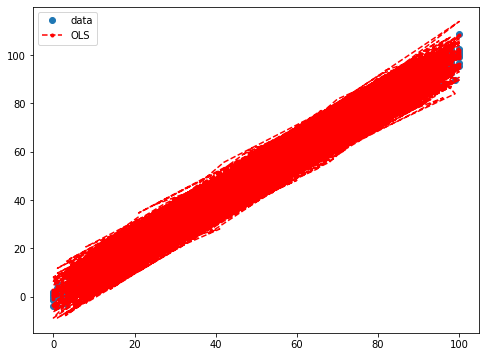

In [14]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(train_set.x, train_set.y, 'o', label="data")
ax.plot(train_set.x, model.fittedvalues, 'r--.', label="OLS")
ax.plot(train_set.x, iv_u, 'r--')
ax.plot(train_set.x, iv_l, 'r--')
ax.legend(loc='best');



In [15]:
pred = model.predict(train_set)
print(pred)


0      21.906326
1      47.563526
2      17.618614
3      36.793680
4      86.991860
         ...    
695    58.583339
696    94.254988
697    88.293566
698    63.586743
699    94.601676
Length: 699, dtype: float64


In [16]:
test_y = train_set.y
print(test_y)

0      21.549452
1      47.464463
2      17.218656
3      36.586398
4      87.288984
         ...    
695    58.595006
696    94.625094
697    88.603770
698    63.648685
699    94.975266
Name: y, Length: 699, dtype: float64


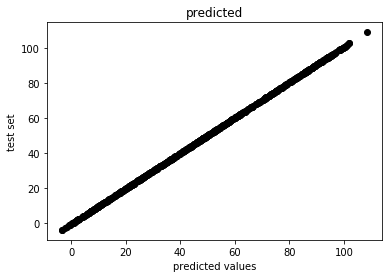

In [17]:
plt.title("predicted")
plt.ylabel("test set")
plt.xlabel("predicted values")
plt.scatter(pred,test_y, color = 'black')
plt.show()